In [199]:
# import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind
import scipy.stats as stats
# import scipy.stats as ss
# from matplotlib import style
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)


# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

gene level amp and del do not corroborate the difference reported by gistic by comparing the q values. also take the genes with fisher pvalue <0.001, and look into DAVID to see if any pathway is enriched. nothing came out interesting.

In [200]:
# look at tcga data at http://firebrowse.org/iCoMut/?cohort=cesc

In [201]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'

In [202]:
# 5 HPV- cases to be exluded from the analysis
hpv_neg_cases = ['HTMCP-03-06-02007', 
                 'HTMCP-03-06-02026', 
                 'HTMCP-03-06-02085', 
                 'HTMCP-03-06-02157', 
                 'HTMCP-03-06-02448']
other_malignance = ['HTMCP-03-06-02061']

In [203]:
inf = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
clinic = pd.read_csv(inf, sep='\t', index_col='patient', usecols=['patient', 'HIV_status'])
clinic.head(2)

clinic.shape
clinic = clinic.drop(hpv_neg_cases)
clinic.shape

assert ('HTMCP-03-06-02061' in clinic.index) == False
HIV_pos_cases = clinic.query('HIV_status == "{}"'.format('Positive')).index.tolist()
HIV_neg_cases = clinic.query('HIV_status == "{}"'.format('Negative')).index.tolist()
len(HIV_pos_cases)
len(HIV_neg_cases)

,HIV_status
patient,
HTMCP-03-06-02001,Positive
HTMCP-03-06-02002,Negative


(123, 1)

(118, 1)

73

45

In [204]:
f1 = '{}cnv_annotated_files_cleaned.txt'.format(wkdir)
df1 = pd.read_csv(f1, sep='\t',header=None)
df1.columns = ['patient', 'cnv']
df1.head()          

,patient,cnv
0,HTMCP-03-06-02001,/projects/trans_scratch/validations/workspace/...
1,HTMCP-03-06-02002,/projects/trans_scratch/validations/workspace/...
2,HTMCP-03-06-02003,/projects/trans_scratch/validations/workspace/...
3,HTMCP-03-06-02006,/projects/trans_scratch/validations/workspace/...
4,HTMCP-03-06-02007,/projects/trans_scratch/validations/workspace/...


In [205]:
%%bash 
# processing cnv annotated files to get ride of mysterious extra columns with "\tyes"
# cd /projects/trans_scratch/validations/workspace/szong/Cervical/cnv
# while read a b;do sed 's/\tyes//g' $b > cnv_annotated_files_cleaned/$a.cleaned;done <cnv_annotated_files.txt


In [206]:
df = pd.DataFrame()
for _, row in df1.iterrows():
    patient = row['patient']
    print('processing {}'.format(patient))
    f = row['cnv']
    dftmp = pd.read_csv(f, sep='\t', usecols=['Ensembl_ID', 'Gene_Name', 'HMM_State'])
    dftmp.columns = ['Ensembl_ID', 'Gene_Name', patient]
    dftmp = dftmp.drop_duplicates()
    
#     Ensembl_ID = dftmp.Ensembl_ID
#     print(Ensembl_ID[Ensembl_ID.duplicated()])
#     print(dftmp[dftmp.Ensembl_ID == "ENSG00000198466"])
    dftmp.set_index(['Ensembl_ID', 'Gene_Name'], inplace=True)
    dftmp = dftmp.astype(int)
#     both ensembl id and gene name can be duplicated. weird.
#     ensure no duplicate genes
    assert len(set(dftmp.index.tolist())) == len(dftmp)
#     print(len(set(dftmp.index.tolist())), len(dftmp))
    if df.empty:
        df = dftmp
    else:
        df = pd.merge(df, dftmp, left_index=True, right_index=True, how='outer')


processing HTMCP-03-06-02001
processing HTMCP-03-06-02002
processing HTMCP-03-06-02003
processing HTMCP-03-06-02006
processing HTMCP-03-06-02007
processing HTMCP-03-06-02008
processing HTMCP-03-06-02012
processing HTMCP-03-06-02013
processing HTMCP-03-06-02020
processing HTMCP-03-06-02026
processing HTMCP-03-06-02036
processing HTMCP-03-06-02037
processing HTMCP-03-06-02040
processing HTMCP-03-06-02042
processing HTMCP-03-06-02046
processing HTMCP-03-06-02047
processing HTMCP-03-06-02054
processing HTMCP-03-06-02057
processing HTMCP-03-06-02058
processing HTMCP-03-06-02061
processing HTMCP-03-06-02063
processing HTMCP-03-06-02068
processing HTMCP-03-06-02070
processing HTMCP-03-06-02071
processing HTMCP-03-06-02074
processing HTMCP-03-06-02075
processing HTMCP-03-06-02076
processing HTMCP-03-06-02085
processing HTMCP-03-06-02089
processing HTMCP-03-06-02092
processing HTMCP-03-06-02097
processing HTMCP-03-06-02098
processing HTMCP-03-06-02099
processing HTMCP-03-06-02103
processing HTM

In [207]:
df.head(2)

,,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
Ensembl_ID,Gene_Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,DPM1,2,2,2,2,2,1,2,4,2,2,...,3.0,2.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
ENSG00000000457,SCYL3,2,3,3,3,2,2,3,4,3,2,...,2.0,3.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0


In [208]:
df = df.drop(hpv_neg_cases, axis=1)
df_pos = df[HIV_pos_cases]
df_neg = df[HIV_neg_cases]

In [209]:
df_pos.shape

(52961, 73)

In [210]:
df['amp_fraction'] = df[df > 2].count(axis=1)/df.shape[1]
df['del_fraction'] = df[df < 2].count(axis=1)/df.shape[1]

In [211]:
num_hiv_pos = df_pos.shape[1]
num_hiv_neg = df_neg.shape[1]
df['amp_count_hiv_pos'] = df_pos[df_pos > 2].count(axis=1)
df['amp_fraction_hiv_pos'] = df['amp_count_hiv_pos']/num_hiv_pos

df['amp_count_hiv_neg'] = df_neg[df_neg > 2].count(axis=1)
df['amp_fraction_hiv_neg'] = df['amp_count_hiv_neg']/num_hiv_neg


df['del_count_hiv_pos'] = df_pos[df_pos < 2].count(axis=1)
df['del_fraction_hiv_pos'] = df['del_count_hiv_pos']/num_hiv_pos

df['del_count_hiv_neg'] = df_neg[df_neg < 2].count(axis=1)
df['del_fraction_hiv_neg'] = df['del_count_hiv_neg']/num_hiv_neg

In [212]:
df.head(3)

,,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02036,HTMCP-03-06-02037,...,amp_fraction,del_fraction,amp_count_hiv_pos,amp_fraction_hiv_pos,amp_count_hiv_neg,amp_fraction_hiv_neg,del_count_hiv_pos,del_fraction_hiv_pos,del_count_hiv_neg,del_fraction_hiv_neg
Ensembl_ID,Gene_Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,DPM1,2,2,2,2,1,2,4,2,2,2,...,0.445378,0.033333,32,0.438356,20,0.444444,1,0.013699,2,0.044444
ENSG00000000457,SCYL3,2,3,3,3,2,3,4,3,2,2,...,0.428571,0.016667,23,0.315068,28,0.622222,1,0.013699,0,0.000000
ENSG00000000460,C1orf112,2,3,3,4,2,3,4,3,2,2,...,0.394958,0.016667,20,0.273973,27,0.600000,1,0.013699,0,0.000000


In [213]:
def fisher_exact_test(v1, v2, n1, n2):
    oddsratio, pvalue = stats.fisher_exact([[v1, v2], [n1-v1, n2-v2]])
#     print(pvalue)
    return pvalue


In [214]:
df['amp_fisher_pvalue'] = df[['amp_count_hiv_pos', 'amp_count_hiv_neg']].apply(lambda x: fisher_exact_test(x[0], x[1], num_hiv_pos, num_hiv_neg), axis=1)
df['del_fisher_pvalue'] = df[['del_count_hiv_pos', 'del_count_hiv_neg']].apply(lambda x: fisher_exact_test(x[0], x[1], num_hiv_pos, num_hiv_neg), axis=1)

In [215]:
df.tail()

,,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02036,HTMCP-03-06-02037,...,amp_count_hiv_pos,amp_fraction_hiv_pos,amp_count_hiv_neg,amp_fraction_hiv_neg,del_count_hiv_pos,del_fraction_hiv_pos,del_count_hiv_neg,del_fraction_hiv_neg,amp_fisher_pvalue,del_fisher_pvalue
Ensembl_ID,Gene_Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000267797,RP11-873E20.2,2,2,2,2,2,2,2,1,2,2,...,4,0.054795,5,0.111111,8,0.109589,2,0.044444,0.299105,0.314195
ENSG00000267798,RP11-333J10.3,2,2,2,2,2,2,3,2,2,2,...,4,0.054795,3,0.066667,2,0.027397,1,0.022222,1.000000,1.000000
ENSG00000267799,CTC-478M6.1,2,2,2,2,2,2,3,2,2,4,...,17,0.232877,20,0.444444,2,0.027397,2,0.044444,0.024077,0.635278
ENSG00000267800,RP11-49K24.5,2,2,2,2,2,2,2,1,2,2,...,2,0.027397,4,0.088889,10,0.136986,3,0.066667,0.200028,0.365227
ENSG00000267801,RP11-552F3.9,2,2,2,2,2,2,3,2,2,2,...,10,0.136986,8,0.177778,1,0.013699,0,0.000000,0.603021,1.000000


In [220]:
df.to_csv('{}copy_number_gene_level.txt'.format(wkdir), sep='\t')

In [218]:
df[df['amp_fisher_pvalue']<0.001].shape

(101, 131)

In [ ]:
df[df]

In [222]:
stats.fisher_exact([[47, 38], [26,7]])

(0.33299595141700405, 0.02087164123113717)

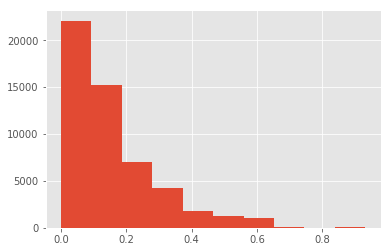

In [169]:
# simple test to see if fractions of patients for amp or del  are different for hiv+ and hiv- group
df['amp_fraction_hiv_pos'].hist()

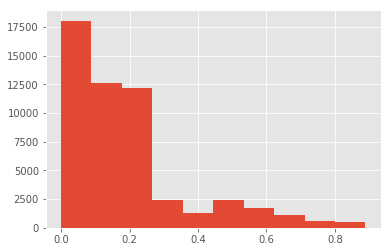

In [170]:
df['amp_fraction_hiv_neg'].hist()

In [114]:
dfx = df.reset_index()
dfx[dfx.Gene_Name=='ZNF807']

,Ensembl_ID,Gene_Name,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,...,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448,amp_fraction,del_fraction
35903,ENSG00000239210,ZNF807,2,2,2,2,2,2,2,3,...,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0.379032,0.048
39164,ENSG00000248830,ZNF807,2,2,2,2,2,2,2,3,...,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0.379032,0.048


In [115]:
df.shape

(52961, 126)

In [119]:
dfy = df.drop_duplicates().reset_index()
dfy[dfy.Gene_Name=='ZNF807']

,Ensembl_ID,Gene_Name,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,...,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448,amp_fraction,del_fraction
18132,ENSG00000239210,ZNF807,2,2,2,2,2,2,2,3,...,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0.379032,0.048
19203,ENSG00000248830,ZNF807,2,2,2,2,2,2,2,3,...,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0.379032,0.048


In [120]:
dfy.shape

(22843, 128)

In [125]:
df.index.duplicated().any()

False

In [41]:
df.HMM_State.unique() # this is a indication that is copy number

array([2, 3, 1, 4, 0, 5])

In [63]:
df.head()

,Gene_Name,HTMCP-03-06-02001,HTMCP-03-06-02002
0,RP11-150L8.3,2,2
1,RP11-150L8.4,2,2
2,RP11-139F4.2,2,2
3,RIOK3P1,2,3
4,RP11-139F4.1,2,2
